In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Ex_CEOSalary.csv', encoding = 'utf-8')
data.info() #기본적으로 .info() 랑, .head() 로 대충 자료의 특성이랑 구조 파악먼저 할 것 !

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


In [4]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


In [5]:
data

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1
...,...,...,...,...
204,930,1509.099976,9.0,4
205,525,1097.099976,15.5,4
206,658,4542.600098,12.1,4
207,555,2023.000000,13.7,4


In [7]:
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [12]:
data['industry'] = data['industry'].replace([1,2,3,4], ['Service', 'IT', 'Finance', 'Others'])
data['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

<AxesSubplot:ylabel='industry'>

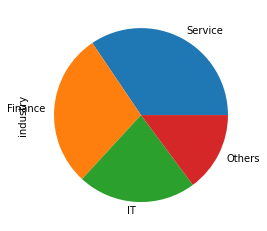

In [15]:
data['industry'].value_counts().plot(kind = "pie")

<AxesSubplot:>

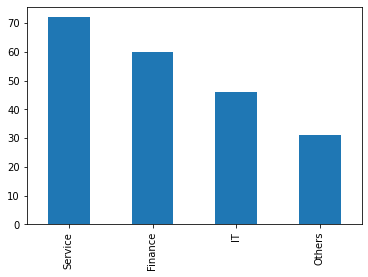

In [16]:
data['industry'].value_counts().plot(kind = 'bar')

In [17]:
data.describe() #데이터의 기본적인 요약 통계량을 말해줌
# 여기서 평균(mean) 과 중위값(50%) 가 큰 차이가 없어야 함.

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


In [18]:
data.skew() #data의 왜도 확인
# 왜도는 정규분포와 비슷한가 ? 를 말해주고 있는 지표임.
# + 값은 우측꼬리 분포 형태, - 값은 좌측꼬리 분포 형태. 0일수록 정규분포와 비슷함

salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

In [20]:
data.kurtosis() #data의 첨도 확인
# 첨도는 얼마나 정규분포로써 뾰족한가! 를 말해줄 수 있음
# 값이 클 수록 중심에 자료가 많이 몰려있다는 의미. 

salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

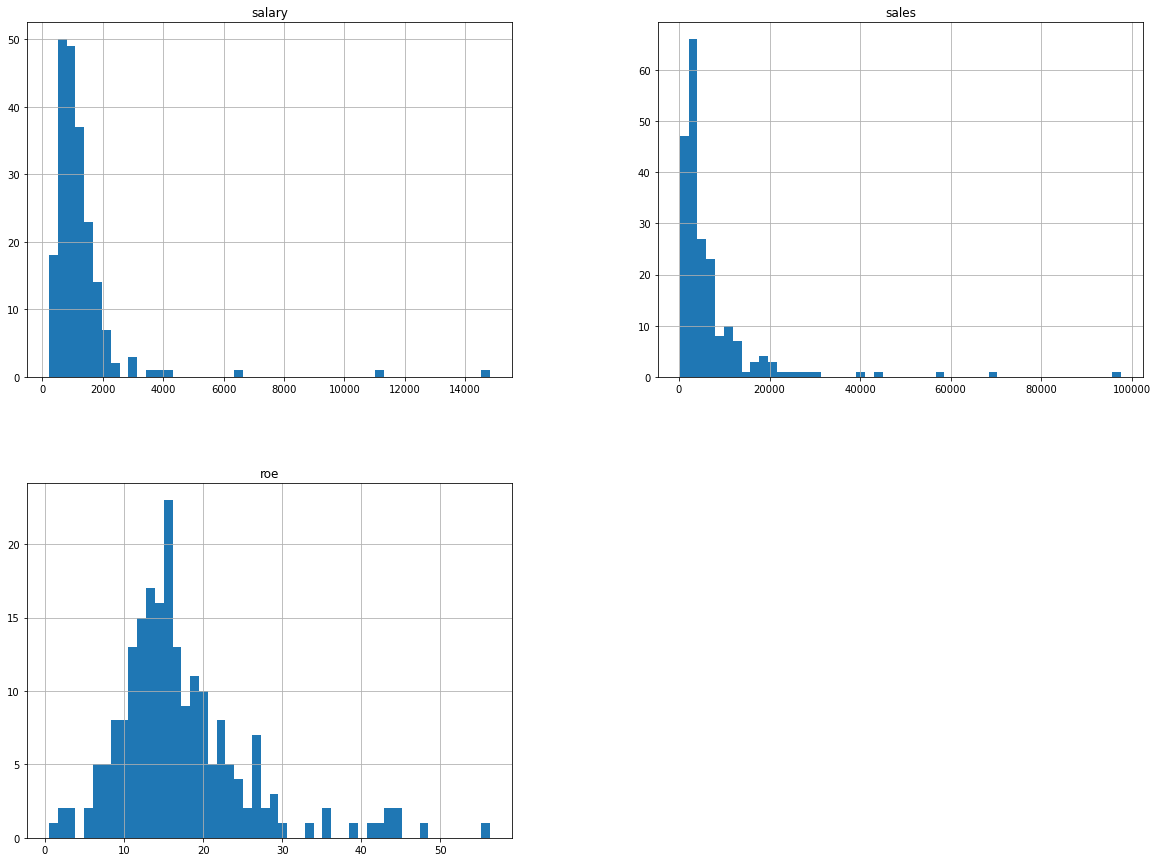

In [22]:
data.hist(bins=50, figsize=(20,15))
# 연속형 자료를 가장 확실하게 볼 수 있는 방법은 각 변수의 분포를 히스토그램으로 변수의 분포를 확인하면 된다
# 여기서 bins 는 구간 너비, figsize 는 도표 크기를 지정한 옵션